# Hand-to-mouth and Consumption-Savings comparison
(Det gode er i bunden btw ;) )

## Solving the model and comparisons

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

from solve_hand_to_mouth import *
from solve_consumption_saving import *
# %pip install EconModel    # Incomment to install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
# model.par.euler = False
# model.par.Na = 1
# model.par.L = 0
# model.allocate()
model.par.eta = 1.0

In [2]:
# Calculate value of employment for hand-to-mouth consumers.
value_function_employment_HTM(model.par, model.par.w, 30 ) # Last parameter is time of employment

9.44246516416037

In [3]:
# Calculate value of employment for consumers with consumption-savings model.
value_function_employment_ConSav(model.par, model.sol)
print(model.par.V_e_t_a[30,0])     # First parameter is time of employment and second is asset
print(model.par.V_e_t_a[30,-1])    # Notice it is now same as for hand-to-mouth consumers

7.553931231495798
9.44244822207484


In [4]:
# Calculates the search effort and value function for an unemployed hand-to-mouth consumer.
unemployed_ss_HTM(model.par,0)   # Last parameter is the type

(0.2791506780052875, -89.76157191767241)

In [5]:
# Calculate the search effort and value function for an unemployed consumption-savings consumer
s, V_u = unemployment_ss_ConSav(model.par, -1, -1, 0) # First parameter is time, second is asset grid, and third is type
print(s, V_u)

0.2791506108329278 -89.7615885601684


## Calculation and plotting of simulated search effort

In [6]:
# Simulate Hand-to-mouth consumer
sim_HTM = model.solve_HTM()

In [7]:
# Simulate Consumption-Savings consumer
sim_ConSav = model.solve_ConSav()

In [8]:
# model.par.model = 'Mixed'
# sim_mixed = model.solve()

Text(0, 0.5, 'Search Effort')

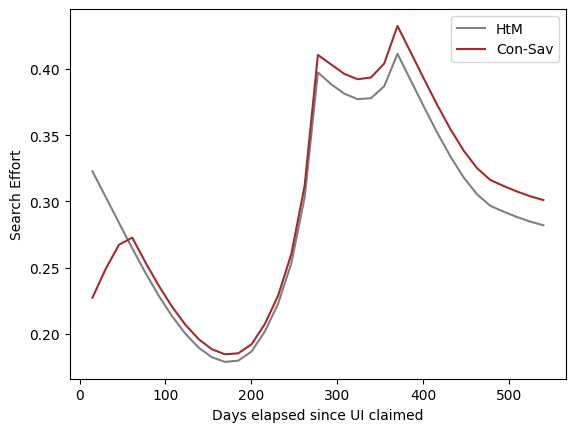

In [9]:
t_sim = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot((t_sim+1)*15, sim_HTM[:], label = 'HtM', color='grey')
plt.plot((t_sim+1)*15, sim_ConSav[:], label = 'Con-Sav', color='brown')
# plt.plot(t_sim, sim_mixed[:], label = 'Mixed')
plt.legend()
# plt.title('Search Effort over simulated for all types')
plt.xlabel('Days elapsed since UI claimed')
plt.ylabel('Search Effort')